### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('/Users/erindoherty/Downloads/module17_starter (1)/data/bank-additional-full-1.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.metrics import (mean_squared_error, ConfusionMatrixDisplay,
                             RocCurveDisplay, confusion_matrix, roc_curve, auc)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC


In [13]:
#replace unknown values in categorical columns with NaN
cols_with_unknown = ["job", "marital", "education",
                     "default", "housing", "loan"]

df[cols_with_unknown] = df[cols_with_unknown].replace("unknown", np.nan)

In [23]:
#ensure specified columns are of type "category" and define group 
cat_cols = ["job", "marital", "education", "default", "month", "day_of_week", "housing", "loan", "contact", "poutcome"]

df[cat_cols] = df[cat_cols].astype("category")

In [25]:
#set up education levels as an ordinal element
edu_order = ["illiterate","basic.4y","basic.6y","basic.9y",
             "high.school","professional.course","university.degree"]
df["education"] = pd.Categorical(df["education"], categories=edu_order, ordered=True)

In [27]:
#create new column for education order converted to numerical order
edu_dtype = pd.api.types.CategoricalDtype(categories=edu_order, ordered=True)

df["education_ord"] = (
    df["education"].astype(edu_dtype)     
                 .cat.codes               
                 .replace(-1, np.nan)     
                 .astype("Int8")          
)

In [29]:
print(df["y"].unique())                   
print(df["y"].isna().sum())              
print(df["y"].value_counts(dropna=False))
print(df["y"].map({"no": 0, "yes": 1}))  


['no' 'yes']
0
y
no     36548
yes     4640
Name: count, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [33]:
df['education_ord'] = df['education_ord'].astype(float)

In [35]:
#perform OHE on categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [39]:
#encode target column "y" as a numeric value and convert other bool values to float types

from sklearn.preprocessing import LabelEncoder
df['y'] = LabelEncoder().fit_transform(df['y'])

bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  education_ord                  39457 non-null  float64
 12  job_blue-collar                41188 non-null 

In [43]:
#accidentally dropped education column for 'illiterate' when OHE. Create a reverse_map dictionary reference to add that column back in based on the ordinal numbers 
edu_map_reverse = {
    0.0: 'illiterate',
    1.0: 'basic.4y',
    2.0: 'basic.6y',
    3.0: 'basic.9y',
    4.0: 'high.school',
    5.0: 'professional.course',
    6.0: 'university.degree'
}
df['education_label'] = df['education_ord'].map(edu_map_reverse)

df['education_illiterate'] = (df['education_label'] == 'illiterate').astype(float)
df = df.drop(columns=['education_label'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  education_ord                  39457 non-null  float64
 12  job_blue-collar                41188 non-null 

In [45]:
#drop rows with null values 
df = df.dropna(subset=['education_ord'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39457 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39457 non-null  int64  
 1   duration                       39457 non-null  int64  
 2   campaign                       39457 non-null  int64  
 3   pdays                          39457 non-null  int64  
 4   previous                       39457 non-null  int64  
 5   emp.var.rate                   39457 non-null  float64
 6   cons.price.idx                 39457 non-null  float64
 7   cons.conf.idx                  39457 non-null  float64
 8   euribor3m                      39457 non-null  float64
 9   nr.employed                    39457 non-null  float64
 10  y                              39457 non-null  int64  
 11  education_ord                  39457 non-null  float64
 12  job_blue-collar                39457 non-null  floa

In [47]:
#create a benchmark df inclusive of all columns and remove 'duration' from main df for modeling since this attribute highly affects the output target
benchmark_df = df.copy()        
df = df.drop(columns=["duration"])

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39457 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39457 non-null  int64  
 1   campaign                       39457 non-null  int64  
 2   pdays                          39457 non-null  int64  
 3   previous                       39457 non-null  int64  
 4   emp.var.rate                   39457 non-null  float64
 5   cons.price.idx                 39457 non-null  float64
 6   cons.conf.idx                  39457 non-null  float64
 7   euribor3m                      39457 non-null  float64
 8   nr.employed                    39457 non-null  float64
 9   y                              39457 non-null  int64  
 10  education_ord                  39457 non-null  float64
 11  job_blue-collar                39457 non-null  float64
 12  job_entrepreneur               39457 non-null  floa

In [53]:
print(df['y'].value_counts().sort_index())

y
0    35068
1     4389
Name: count, dtype: int64


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [55]:
check_df = pd.read_csv('/Users/erindoherty/Downloads/module17_starter (2)/data/bank-additional-full2.csv', sep = ';')

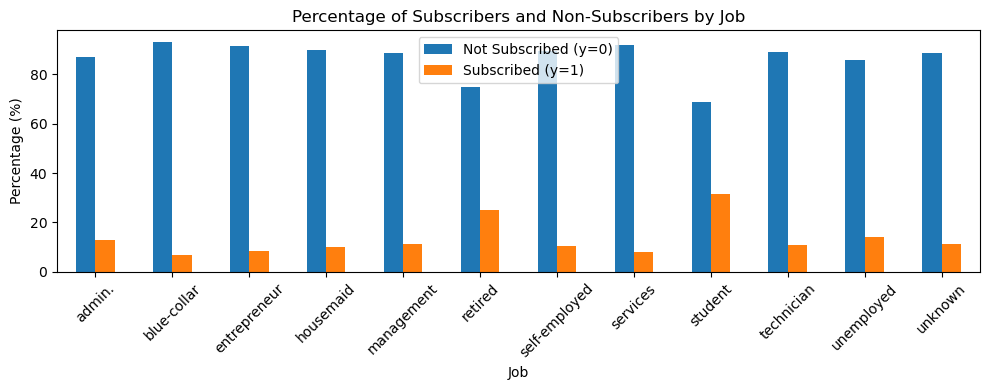

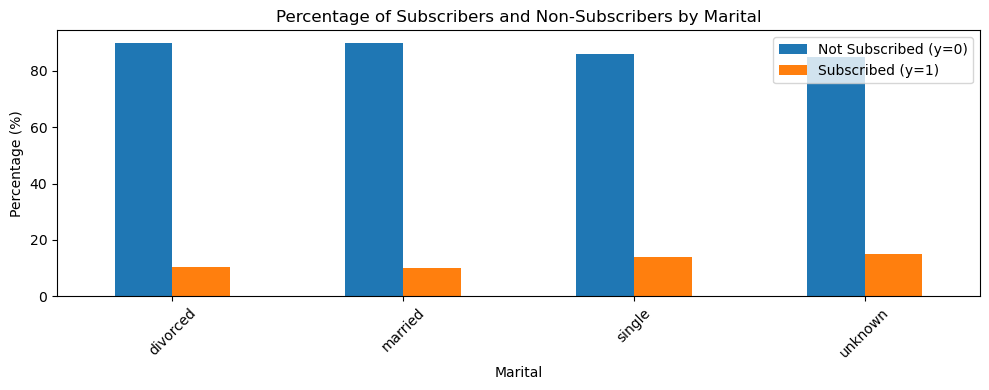

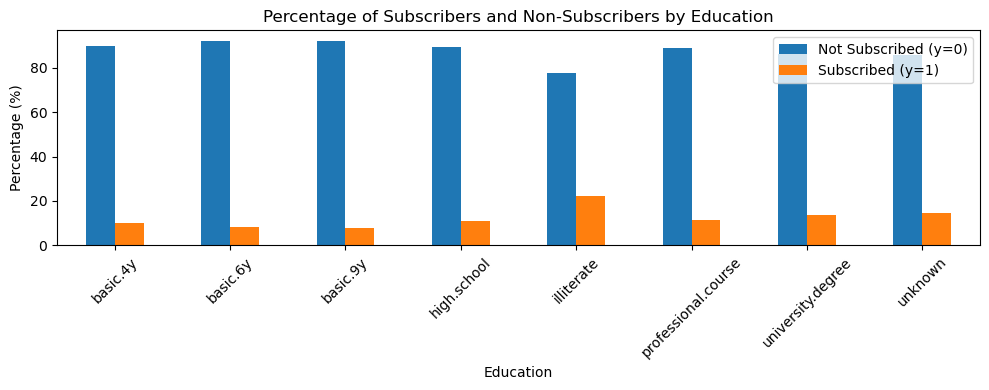

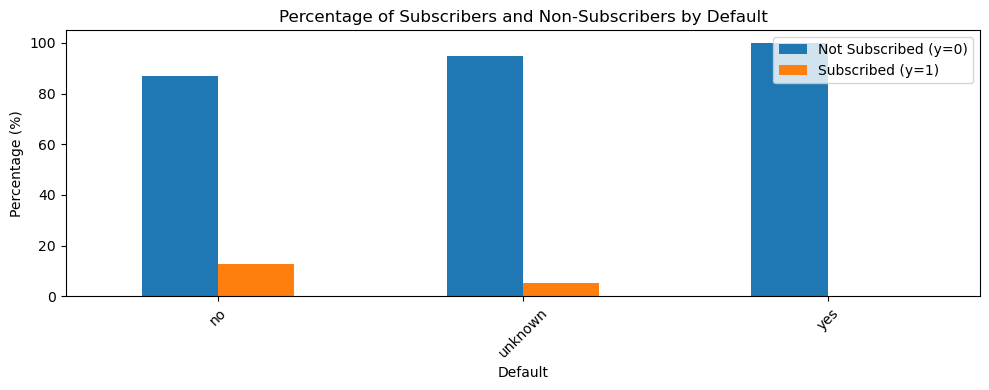

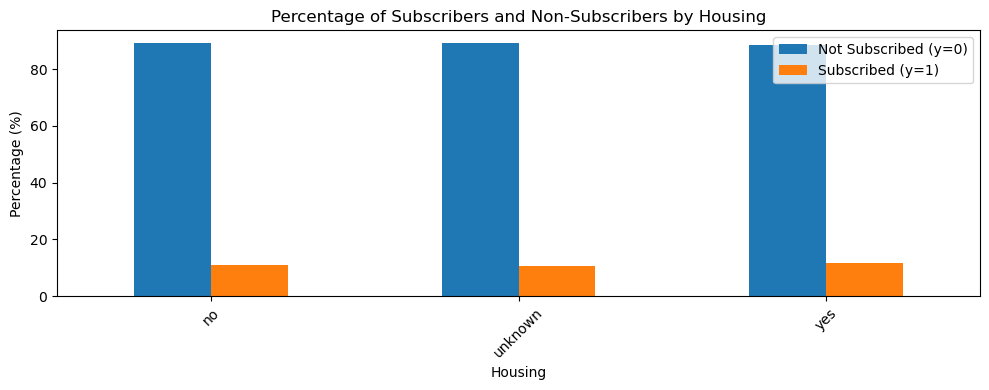

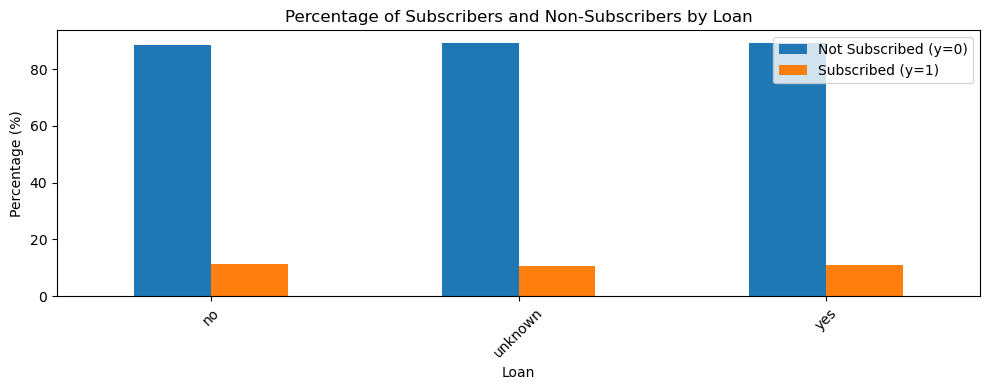

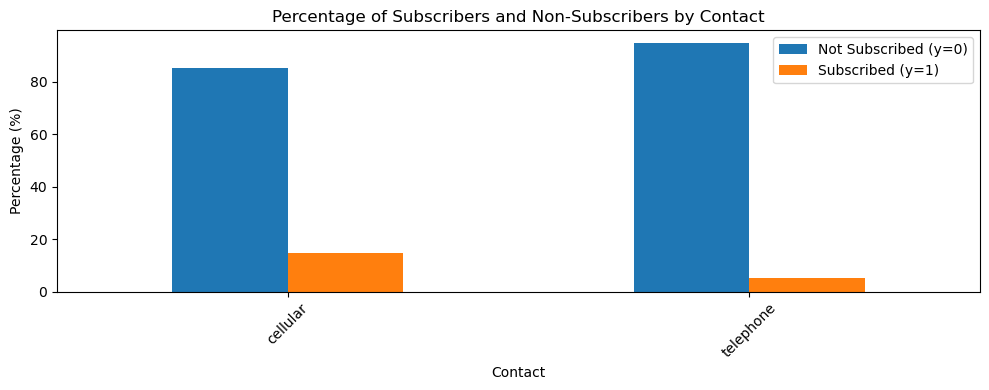

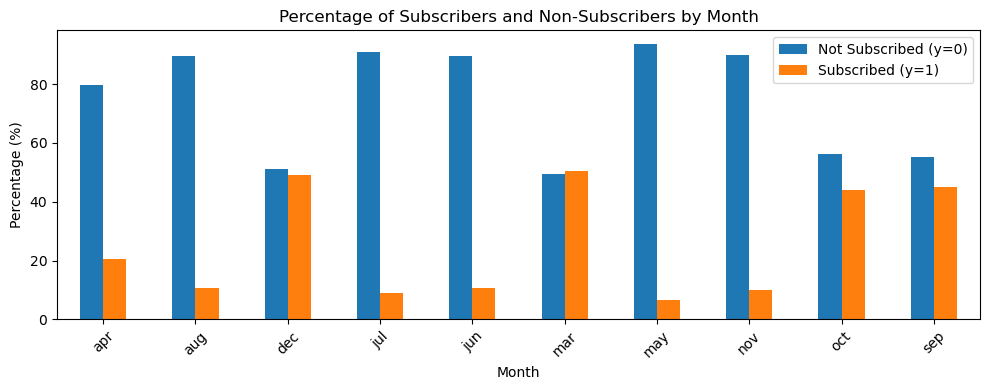

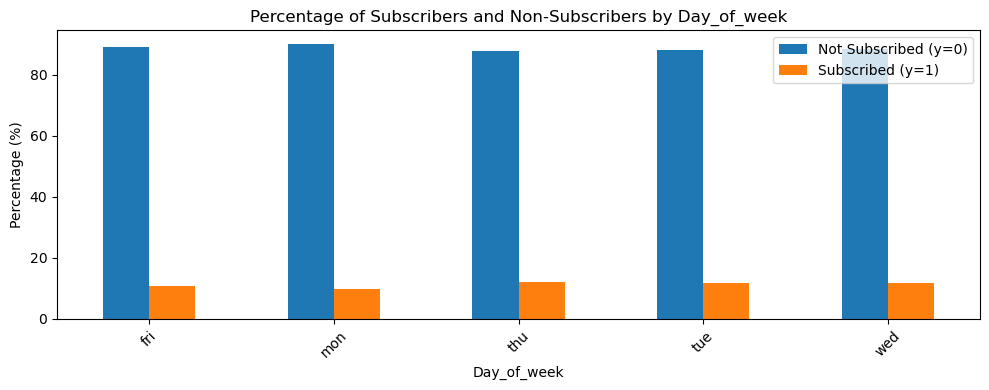

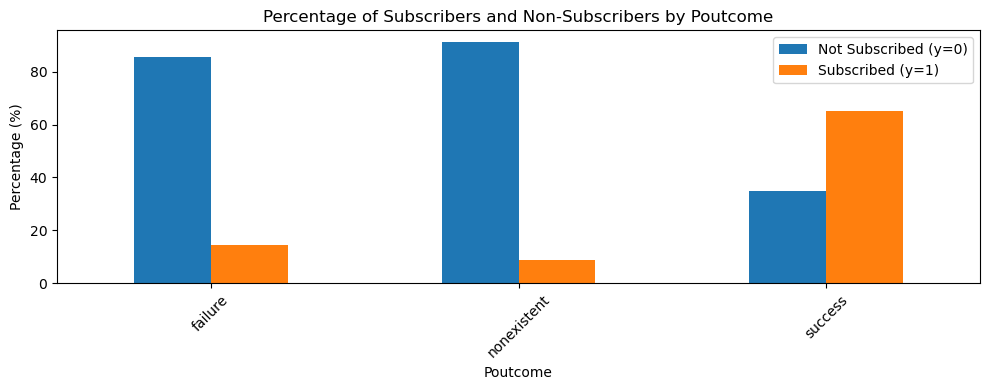

In [57]:
#visualize the data by categorical values that subscribed to a term deposit (target variable y)
if check_df['y'].dtype != int and check_df['y'].dtype != float:
    check_df['y'] = check_df['y'].map({'no': 0, 'yes': 1})

categorical_vars = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    # Get counts for each category and class
    category_counts = check_df.groupby([var, 'y']).size().unstack(fill_value=0)
    # Convert to percentages within each category
    category_perc = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
    category_perc.columns = ['Not Subscribed (y=0)', 'Subscribed (y=1)']
    category_perc.plot(kind='bar', stacked=False, ax=plt.gca())
    plt.title(f'Percentage of Subscribers and Non-Subscribers by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [59]:
continuous_vars = [
    'age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

# normalize the data with fit scaler on the continuous variables
scaler = StandardScaler()
check_df_norm = check_df.copy()
check_df_norm[continuous_vars] = scaler.fit_transform(check_df_norm[continuous_vars])

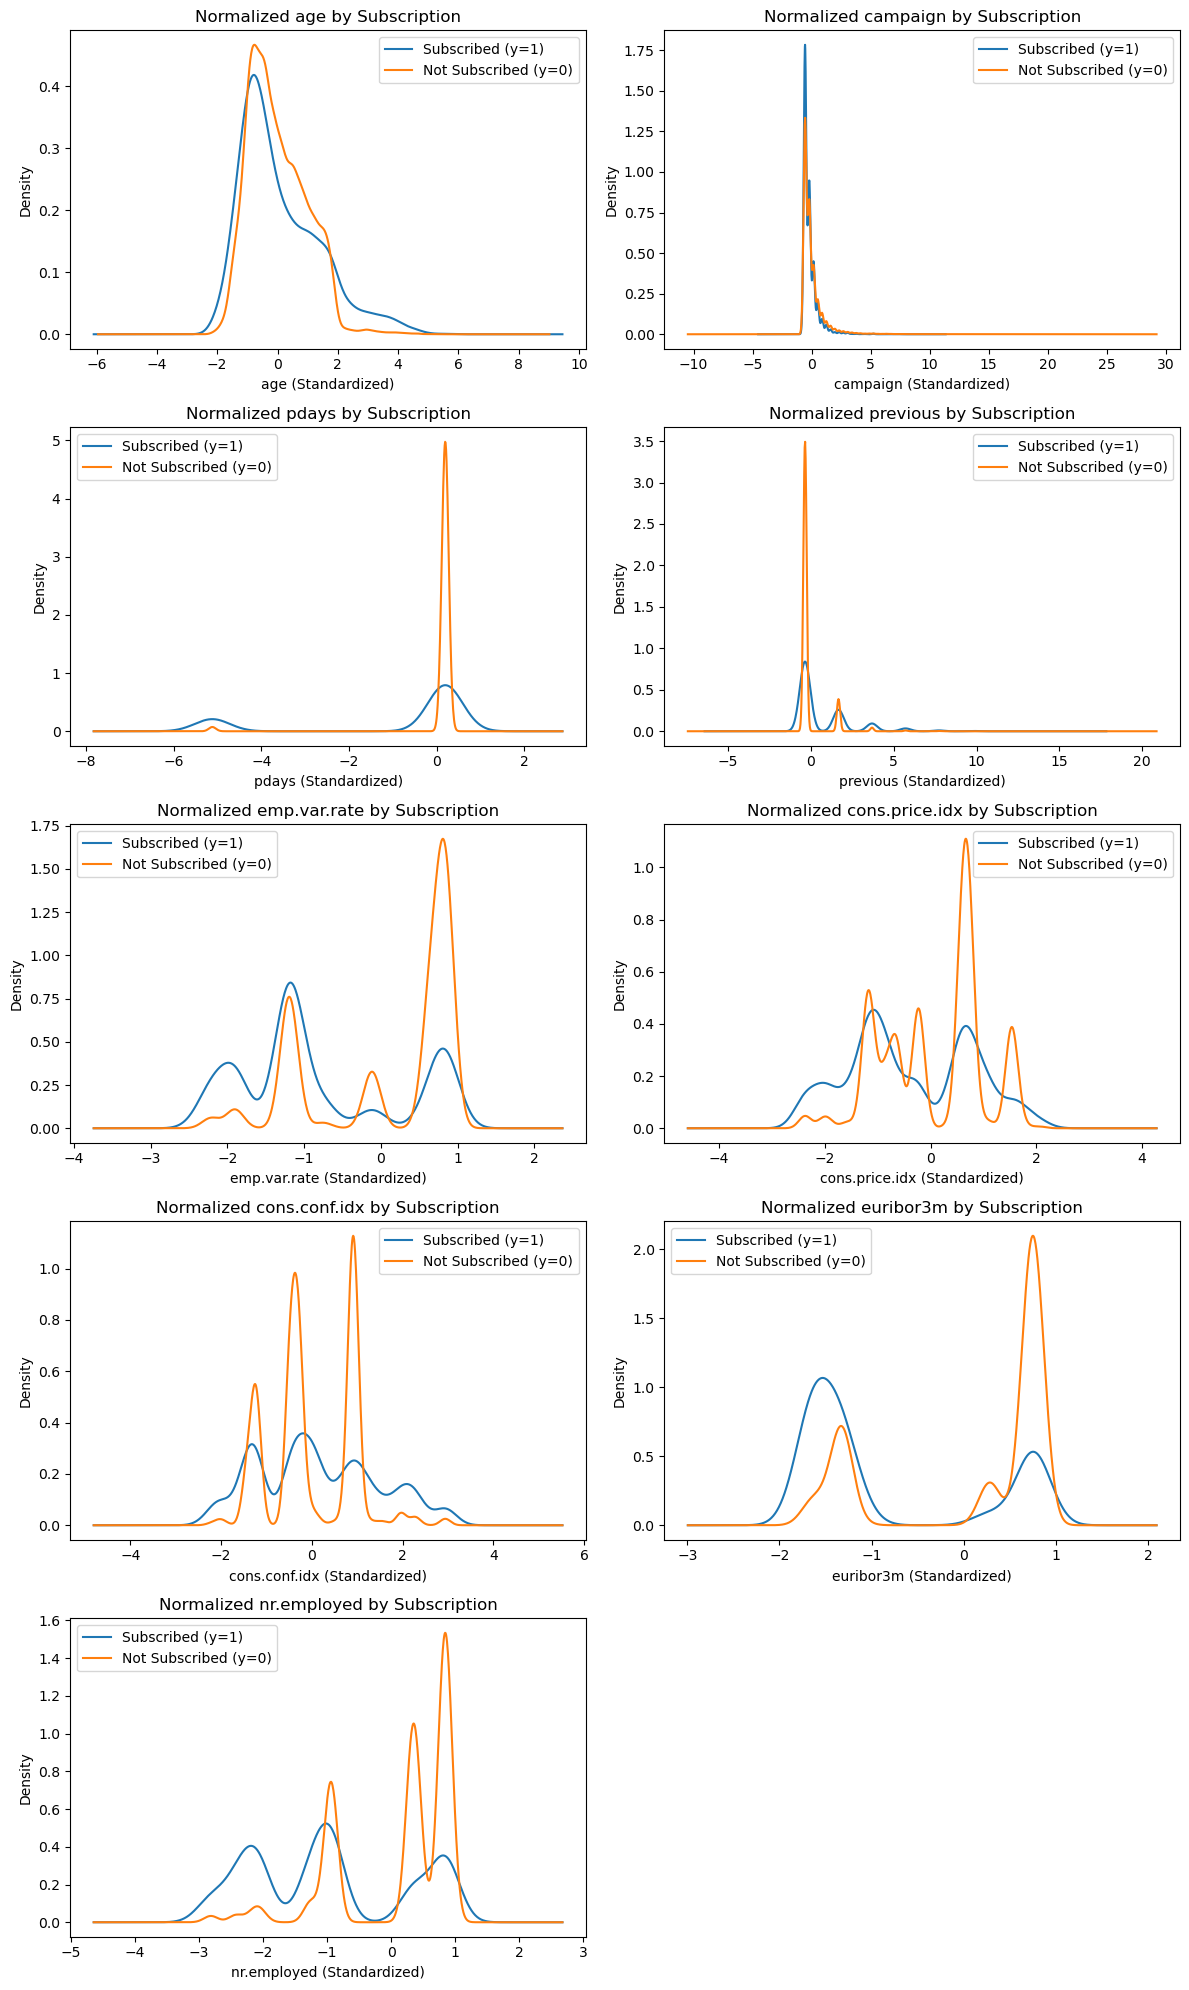

In [61]:
#visualize the data by continuous values that subscribed to a term deposit (target variable y)
continuous_vars = [
    'age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

n = len(continuous_vars)
ncols = 2
nrows = (n + 1) // ncols

plt.figure(figsize=(12, 4 * nrows))

for idx, var in enumerate(continuous_vars, 1):
    plt.subplot(nrows, ncols, idx)
    check_df_norm[check_df_norm['y'] == 1][var].plot(kind='kde', label='Subscribed (y=1)')
    check_df_norm[check_df_norm['y'] == 0][var].plot(kind='kde', label='Not Subscribed (y=0)')
    plt.title(f'Normalized {var} by Subscription')
    plt.xlabel(f'{var} (Standardized)')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()



In [65]:
#make a copy of the main df to fit scale and transform the continuous variables. 
from sklearn.preprocessing import StandardScaler

continuous_vars = [
    'age', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[continuous_vars] = scaler.fit_transform(df_scaled[continuous_vars])


In [69]:
#set feature matrix, excluding target feature y
feature_cols = [col for col in df_scaled.columns if col != 'y']
X = df_scaled[feature_cols]
y = df_scaled['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [75]:
#create accuracy score and f1 score baselines with dummy classifier and majority class
from sklearn.metrics import accuracy_score, f1_score

dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

majority_class = y_train.value_counts().idxmax()
y_pred = [majority_class] * len(y_test)

baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_f1 = f1_score(y_test, y_pred)

print("Stratified Baseline Accuracy:", accuracy_score(y_test, y_dummy))
print("Stratified Baseline F1-score:", f1_score(y_test, y_dummy))
print("Majority Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Majority Baseline F1-score:", f1_score(y_test, y_pred))

Stratified Baseline Accuracy: 0.8060060821084643
Stratified Baseline F1-score: 0.12162937464142283
Majority Baseline Accuracy: 0.8887480993411049
Majority Baseline F1-score: 0.0


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [79]:
#insantiate a logistic regression model, fit with training data and make predictions on the test data

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train) 
y_pred_logreg = logreg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [81]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression F1-score:", f1_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9004054738976178
Logistic Regression F1-score: 0.3259005145797599


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [83]:
#insantiate KNN Classifier, fit with training data and make predictions on the test data
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN F1-score:", f1_score(y_test, y_pred_knn))

KNN Accuracy: 0.892295995945261
KNN F1-score: 0.3541033434650456


In [85]:
#insantiate DecisionTree Classifier, fit with training data and make predictions on the test data
dt = DecisionTreeClassifier(max_depth=5, random_state=42) 
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree F1-score:", f1_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9025595539787126
Decision Tree F1-score: 0.36915504511895


In [87]:
#insantiate a SVM model, fit with training data and make predictions on the test data
svm = SVC(kernel='linear', C=1, random_state=42)  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1-score:", f1_score(y_test, y_pred_svm))

SVM Accuracy: 0.898884946781551
SVM F1-score: 0.3120689655172414


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [143]:
#define test functions prior to performing feature engineering for easier evaluation of model performance improvements later
def test_logreg(X_train, X_test, y_train, y_test):
    logreg_model = LogisticRegression(max_iter=1000, random_state=42)
    logreg_model.fit(X_train, y_train)
    y_pred_logreg = logreg_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_logreg)
    print(f"Logistic Regression F1: {f1:.4f}")
    return f1

def test_knn(X_train, X_test, y_train, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=7)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_knn)
    print(f"KNN F1: {f1:.4f}")
    return f1

def test_dt(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_dt)
    print(f"Decision Tree F1: {f1:.4f}")
    return f1

def test_svm(X_train, X_test, y_train, y_test):
    svm_model = SVC(kernel='linear', C=1, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    f1 = f1_score(y_test, y_pred_svm)
    print(f"SVM F1: {f1:.4f}")
    return f1


In [151]:
#I will be exploring feature engineering in action groups. Create results df and logging function to track and compare improvements along the way
results_df = pd.DataFrame(columns=[
    'Group', 'Model', 'F1_test', 'F1_cv', 'Best_Params', 'F1_cv_best'
])

def log_results(group, model_name, f1_test=None, f1_cv=None, best_params=None, f1_cv_best=None):
    global results_df
    entry = {
        'Group': group,
        'Model': model_name,
        'F1_test': f1_test if f1_test is not None else '',
        'F1_cv': f1_cv if f1_cv is not None else '',
        'Best_Params': best_params if best_params is not None else '',
        'F1_cv_best': f1_cv_best if f1_cv_best is not None else ''
    }
    results_df = pd.concat([
        results_df,
        pd.DataFrame([entry])
    ], ignore_index=True)

In [155]:
#Group 1: drop unneeded feature columns 
drop_cols = [col for col in X.columns if 'illiterate' in col or 'default' in col or 'day_of_week' in col]
X1_train = X_train.drop(columns=drop_cols)
X1_test = X_test.drop(columns=drop_cols)

In [157]:
#Test to see if there is any model improvements for logreg model
f1_logreg_g1 = test_logreg(X1_train, X1_test, y_train, y_test)
log_results('Group 1', 'LogReg', f1_test=f1_logreg_g1)

Logistic Regression F1: 0.3253


In [159]:
#Test to see if there is any model improvements for knn model
f1_knn_g1 = test_knn(X1_train, X1_test, y_train, y_test)
log_results('Group 1', 'KNN', f1_test=f1_knn_g1)

KNN F1: 0.3572


In [161]:
#Test to see if there is any model improvements for dt model
f1_dt_g1 = test_dt(X1_train, X1_test, y_train, y_test)
log_results('Group 1', 'DT', f1_test=f1_dt_g1)

Decision Tree F1: 0.3630


In [ ]:
##[Hold Off due to computation restrictions as well as svm already being the lowest performing model before feature engineering] Test to see if there is any model improvements for svm model
#f1_svm_g1 = test_svm(X1_train, X1_test, y_train, y_test)
#log_results('Group 1', 'SVM', f1_test=f1_svm_g1)

In [167]:
#Group 2: cap outliers for campaign and previous features and test to see if there is any model improvements
X2_test = X1_test.copy()
X2_train = X1_train.copy()

for col in ['campaign', 'previous']:
    cap = X2_train[col].quantile(0.95)
    X2_train[col] = X2_train[col].clip(upper=cap)
    X2_test[col] = X2_test[col].clip(upper=cap)

In [169]:
#Test to see if there is any model improvements for logreg model
f1_logreg_g2 = test_logreg(X2_train, X2_test, y_train, y_test)
log_results('Group 2', 'LogReg', f1_test=f1_logreg_g2)

Logistic Regression F1: 0.3227


In [171]:
#Test to see if there is any model improvements for knn model
f1_knn_g2 = test_knn(X2_train, X2_test, y_train, y_test)
log_results('Group 2', 'KNN', f1_test=f1_knn_g2)

KNN F1: 0.3614


In [173]:
#Test to see if there is any model improvements for dt model
f1_dt_g2 = test_dt(X2_train, X2_test, y_train, y_test)
log_results('Group 2', 'DT', f1_test=f1_dt_g2)

Decision Tree F1: 0.3762


In [ ]:
##[Hold Off due to computation restrictions] Test to see if there is any model improvements for svm model
#f1_svm_g2 = test_svm(X2_train, X2_test, y_train, y_test)
#log_results('Group 2', 'SVM', f1_test=f1_svm_g2)

In [175]:
#Group 3: create quadratic and interaction features
X3_train = X_train.copy()
X3_test = X_test.copy()
for df in [X3_train, X3_test]:
    df['age_squared'] = df['age'] ** 2
    df['previous_squared'] = df['previous'] ** 2
    df['euribor3m_squared'] = df['euribor3m'] ** 2
    df['emp_euribor_product'] = df['emp.var.rate'] * df['euribor3m']
    df['emp_euribor_ratio'] = df['emp.var.rate'] / (df['euribor3m'] + 1e-6)

In [177]:
#define cross validation function 
def cross_val_f1(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv)
    print(f"Cross-validated F1 scores: {scores}")
    print(f"Mean F1: {scores.mean():.4f} (std: {scores.std():.4f})")
    return scores.mean()

In [181]:
#retrain logreg model, test for model performance change and run cross-validation after creating new features 
from sklearn.model_selection import cross_val_score
logreg3 = LogisticRegression(max_iter=1000, random_state=42)
logreg3.fit(X3_train, y_train)

f1_logreg_g3 = test_logreg(X3_train, X3_test, y_train, y_test)

f1_cv_logreg_g3 = cross_val_f1(LogisticRegression(max_iter=1000, random_state=42), X3_train, y_train)
log_results('Group 3', 'LogReg', f1_test=f1_logreg_g3, f1_cv=f1_cv_logreg_g3)

Logistic Regression F1: 0.3313
Cross-validated F1 scores: [0.36270492 0.36439791 0.33510074 0.35095137 0.29967427]
Mean F1: 0.3426 (std: 0.0239)


In [183]:
#retrain knn model, test for model performance change and run cross-validation after creating new features 
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X3_train, y_train)

f1_knn_g3 = test_knn(X3_train, X3_test, y_train, y_test)

f1_cv_knn_g3 = cross_val_f1(KNeighborsClassifier(n_neighbors=7), X3_train, y_train)
log_results('Group 3', 'KNN', f1_test=f1_knn_g3, f1_cv=f1_cv_knn_g3)

KNN F1: 0.3606
Cross-validated F1 scores: [0.36178108 0.36203523 0.3229572  0.35193945 0.32602479]
Mean F1: 0.3449 (std: 0.0171)


In [185]:
#retrain dt model, test for model performance change and run cross-validation after creating new features 
dt3 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt3.fit(X3_train, y_train)

f1_dt_g3 = test_dt(X3_train, X3_test, y_train, y_test)

f1_cv_dt_g3 = cross_val_f1(DecisionTreeClassifier(max_depth=5, random_state=42), X3_train, y_train)
log_results('Group 3', 'DT', f1_test=f1_dt_g3, f1_cv=f1_cv_dt_g3)

Decision Tree F1: 0.3753
Cross-validated F1 scores: [0.39688716 0.40980392 0.34384537 0.35881753 0.35055724]
Mean F1: 0.3720 (std: 0.0264)


In [ ]:
##[Hold Off due to computation restrictions] retrain svm model and run cross-validation after creating new features 
#svm3 = SVC(kernel='linear', C=1, random_state=42)
#svm3.fit(X3_train, y_train)

In [187]:
print(results_df)

     Group   Model   F1_test     F1_cv Best_Params F1_cv_best
0  Group 1  LogReg  0.325342                                 
1  Group 1  LogReg  0.325342                                 
2  Group 1     KNN  0.357198                                 
3  Group 1      DT  0.363031                                 
4  Group 2  LogReg  0.322747                                 
5  Group 2     KNN  0.361390                                 
6  Group 2      DT  0.376206                                 
7  Group 3  LogReg  0.331341  0.342566                       
8  Group 3     KNN  0.360581  0.344948                       
9  Group 3      DT  0.375301  0.371982                       


In [189]:
#tune hyperparameters with grid search for log reg model
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='f1', cv=5)
logreg_grid.fit(X3_train, y_train)
best_c = logreg_grid.best_params_
best_f1 = logreg_grid.best_score_

mask = (results_df['Group'] == 'Group 3') & (results_df['Model'] == 'LogReg')
results_df.loc[mask, 'Best_Params'] = str(best_c)    
results_df.loc[mask, 'F1_cv_best'] = best_f1


In [191]:
#tune hyperparameters with grid search for knn model
param_grid_knn = {'n_neighbors': [3, 5, 7, 11, 15]}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='f1', cv=5)
knn_grid.fit(X3_train, y_train)
best_k = knn_grid.best_params_
best_f1_knn = knn_grid.best_score_

mask_knn = (results_df['Group'] == 'Group 3') & (results_df['Model'] == 'KNN')
results_df.loc[mask_knn, 'Best_Params'] = str(best_k)
results_df.loc[mask_knn, 'F1_cv_best'] = best_f1_knn

In [193]:
#tune hyperparameters with grid search for dt model
param_grid_dt = {'max_depth': [3, 5, 7, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, scoring='f1', cv=5)
dt_grid.fit(X3_train, y_train)
best_depth = dt_grid.best_params_
best_f1_dt = dt_grid.best_score_

mask_dt = (results_df['Group'] == 'Group 3') & (results_df['Model'] == 'DT')
results_df.loc[mask_dt, 'Best_Params'] = str(best_depth)
results_df.loc[mask_dt, 'F1_cv_best'] = best_f1_dt

print(results_df)

     Group   Model   F1_test     F1_cv         Best_Params F1_cv_best
0  Group 1  LogReg  0.325342                                         
1  Group 1  LogReg  0.325342                                         
2  Group 1     KNN  0.357198                                         
3  Group 1      DT  0.363031                                         
4  Group 2  LogReg  0.322747                                         
5  Group 2     KNN  0.361390                                         
6  Group 2      DT  0.376206                                         
7  Group 3  LogReg  0.331341  0.342566          {'C': 100}   0.347922
8  Group 3     KNN  0.360581  0.344948  {'n_neighbors': 5}    0.35037
9  Group 3      DT  0.375301  0.371982    {'max_depth': 5}   0.371982


In [ ]:
##tune hyperparameters with grid search for svm model
#param_grid = {'C': [0.1, 1, 10]}
#svm_grid = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, scoring='f1', cv=3)
#svm_grid.fit(X3_train, y_train)1

In [203]:
#test to see if using a random forest model is better than Decision trees, and perform cross validation
from sklearn.ensemble import RandomForestClassifier

X4_train = X3_train.copy()
X4_test = X3_test.copy()

rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X4_train, y_train)
y_pred_rf = rf.predict(X4_test)

f1_cv_rf_g4 = cross_val_f1(RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42), X4_train, y_train)

f1_rf_g4 = f1_score(y_test, y_pred_rf)
log_results('Group 4', 'RandomForest', f1_test=f1_rf_g4, f1_cv=f1_cv_rf_g4)

Cross-validated F1 scores: [0.30387931 0.32491767 0.29988975 0.32613391 0.28253615]
Mean F1: 0.3075 (std: 0.0164)


In [205]:
#tune hyperparameters with grid search
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='f1',
    cv=5
)
rf_grid.fit(X4_train, y_train)
best_rf_params = rf_grid.best_params_
best_rf_f1 = rf_grid.best_score_

mask_rf = (results_df['Group'] == 'Group 4') & (results_df['Model'] == 'RandomForest')
results_df.loc[mask_rf, 'Best_Params'] = str(best_rf_params)
results_df.loc[mask_rf, 'F1_cv_best'] = best_rf_f1

print(results_df)

      Group         Model   F1_test     F1_cv  \
0   Group 1        LogReg  0.325342             
1   Group 1        LogReg  0.325342             
2   Group 1           KNN  0.357198             
3   Group 1            DT  0.363031             
4   Group 2        LogReg  0.322747             
5   Group 2           KNN  0.361390             
6   Group 2            DT  0.376206             
7   Group 3        LogReg  0.331341  0.342566   
8   Group 3           KNN  0.360581  0.344948   
9   Group 3            DT  0.375301  0.371982   
10  Group 4  RandomForest  0.310406  0.307471   

                                          Best_Params F1_cv_best  
0                                                                 
1                                                                 
2                                                                 
3                                                                 
4                                                                 
5        

In [209]:
#test to see if using a gradiant boost model is better than our Decision Tree model, and perform cross validation 
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X4_train, y_train)
y_pred_gbc = gbc.predict(X4_test)

f1_cv_gbc_g4 = cross_val_f1(
    GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    X4_train, y_train
)

f1_gbc_g4 = f1_score(y_test, y_pred_gbc)
log_results('Group 4', 'GBClassifier', f1_test=f1_gbc_g4, f1_cv=f1_cv_gbc_g4)

Cross-validated F1 scores: [0.3582996  0.35654008 0.33229491 0.3755102  0.32597266]
Mean F1: 0.3497 (std: 0.0182)


In [211]:
#tune hyperparameters parameters with grid search 
param_grid_gbc = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

gbc_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gbc,
    scoring='f1',
    cv=5
)
gbc_grid.fit(X4_train, y_train)
best_gbc_params = gbc_grid.best_params_
best_gbc_f1 = gbc_grid.best_score_

mask_gbc = (results_df['Group'] == 'Group 4') & (results_df['Model'] == 'GBClassifier')
results_df.loc[mask_gbc, 'Best_Params'] = str(best_gbc_params)
results_df.loc[mask_gbc, 'F1_cv_best'] = best_gbc_f1

print(results_df)

      Group         Model   F1_test     F1_cv  \
0   Group 1        LogReg  0.325342             
1   Group 1        LogReg  0.325342             
2   Group 1           KNN  0.357198             
3   Group 1            DT  0.363031             
4   Group 2        LogReg  0.322747             
5   Group 2           KNN  0.361390             
6   Group 2            DT  0.376206             
7   Group 3        LogReg  0.331341  0.342566   
8   Group 3           KNN  0.360581  0.344948   
9   Group 3            DT  0.375301  0.371982   
10  Group 4  RandomForest  0.310406  0.307471   
11  Group 4  GBClassifier  0.359867  0.349723   

                                          Best_Params F1_cv_best  
0                                                                 
1                                                                 
2                                                                 
3                                                                 
4                          

In [222]:
results_df_sorted = results_df.sort_values(by='F1_test', ascending=False).reset_index(drop=True)
from IPython.display import display
display(results_df_sorted)

,Group,Model,F1_test,F1_cv,Best_Params,F1_cv_best
0,Group 2,DT,0.376206,,,
1,Group 3,DT,0.375301,0.371982,{'max_depth': 5},0.371982
2,Group 1,DT,0.363031,,,
3,Group 2,KNN,0.361390,,,
4,Group 3,KNN,0.360581,0.344948,{'n_neighbors': 5},0.35037
5,Group 4,GBClassifier,0.359867,0.349723,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.37546
6,Group 1,KNN,0.357198,,,
7,Group 3,LogReg,0.331341,0.342566,{'C': 100},0.347922
8,Group 1,LogReg,0.325342,,,
9,Group 1,LogReg,0.325342,,,


##### Questions